<h1>Chapter 9: READING AND WRITING FILES</h1>

In [40]:
# Module Needed : Path, os 
from pathlib import Path
import os

## Files and File Paths
A file has 2 key properties:
- <i>filename</i>: identifying name given to a computer file. The part of the filename after the last period is called the file’s extension and tells you a file’s type.
- <i>path</i>: specifies location of a file on the compute.

The filename <i>project.docx</i> is a Word document, and Users, Al, and Documents all refer to folders, also called <i>directories</i>. Folders can contain files or other folders. 

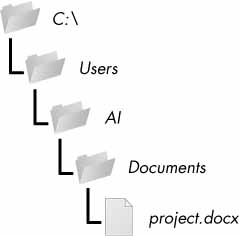

The C:\ part of the path is the root folder, which contains all other folders. On Windows, the root folder is named C:\ and is also called the C: drive. On macOS and Linux, the root folder is /. Depending on which operating system you are currently on, use that style root folder command.

Additional <i>volumes</i>, such as a DVD drive or USB flash drive, will appear differently on different operating systems. On Windows, they appear as new, lettered root drives, such as D:\ or E:\. On macOS, they appear as new folders under the <i>/Volumes</i> folder. On Linux, they appear as new folders under the <i>/mnt</i> (“mount”) folder. Also note that while folder names and filenames are not case-sensitive on Windows and macOS, they are case-sensitive on Linux.

### Note
Because your system probably has different files and folders on it than mine, you won’t be able to follow every example in this chapter exactly. Still, try to follow along using folders that exist on your computer.

## Backslash on Windows and Forward Slash on macOS and Linux
On Windows, paths are written using backslashes (\) as the separator between folder names. The macOS and Linux operating systems, however, use the forward slash (/) as their path separator. If you want your programs to work on all operating systems, you will have to write your Python scripts to handle both cases.

Fortunately, this is simple to do with the `Path()` function in the pathlib module. If you pass it the string values of individual file and folder names in your path, `Path()` will return a string with a file path using the correct path separators. Enter the following into the interactive shell:

In [41]:
#from pathlib import Path
Path('spam', 'bacon', 'eggs')

PosixPath('spam/bacon/eggs')

In [42]:
str(Path('spam', 'bacon', 'eggs'))

'spam/bacon/eggs'

Note that the convention for importing `pathlib` is to run `from pathlib import Path`, since otherwise we’d have to enter `pathlib.Path` everywhere Path shows up in our code. Not only is this extra typing redundant, but it’s also redundant.

If you are running this chapter’s interactive shell examples on Windows, `Path('spam', 'bacon', 'eggs')` should return a WindowsPath object for the joined path, represented as `WindowsPath('spam/bacon/eggs')`. Even though Windows uses backslashes, the WindowsPath representation in the interactive shell displays them using forward slashes, since open source software developers have historically favored the Linux operating system.

If you want to get a simple text string of this path, you can pass it to the `str()` function, which in our example returns 'spam\\bacon\\eggs'. (Notice that the backslashes are doubled because each backslash needs to be escaped by another backslash character.) If you had called this function on Linux, `Path()` would have returned a PosixPath object that, when passed to `str()`, would have returned `'spam/bacon/eggs'`. (POSIX is a set of standards for Unix-like operating systems such as Linux.)

These Path objects (really, WindowsPath or PosixPath objects, depending on your operating system) will be passed to several of the file-related functions introduced in this chapter. For example, the following code joins names from a list of filenames to the end of a folder’s name:

In [43]:
#from pathlib import Path
myFiles = ['accounts.txt', 'details.csv', 'invite.docx']
for filename in myFiles:
        print(Path(r'C:\Users\Al', filename))

C:\Users\Al/accounts.txt
C:\Users\Al/details.csv
C:\Users\Al/invite.docx


On Windows, the backslash separates directories, so you can’t use it in filenames. However, you can use backslashes in filenames on macOS and Linux. So while `Path(r'spam\eggs')` refers to two separate folders (or a file <i>eggs</i> in a folder <i>spam</i>) on Windows, the same command would refer to a single folder (or file) named <i>spam\eggs</i> on macOS and Linux. For this reason, it’s usually a good idea to always use forward slashes in your Python code (and I’ll be doing so for the rest of this chapter). The `pathlib` module will ensure that it always works on all operating systems.

Note that `pathlib` was introduced in Python 3.4 to replace older os.path functions. The Python Standard Library modules support it as of Python 3.6, but if you are working with legacy Python 2 versions, I recommend using `pathlib2`, which gives you pathlib’s features on Python 2.7. Appendix A has instructions for installing `pathlib2` using pip. Whenever I’ve replaced an older os.path function with pathlib, I’ve made a short note. You can look up the older functions at https://docs.python.org/3/library/os.path.html.

## Using the / Operator to Join Paths
We normally use the `+` operator to add two integer or floating-point numbers, such as in the expression `2 + 2`, which evaluates to the integer value `4`. But we can also use the `+` operator to concatenate two string values, like the expression `'Hello' + 'World'`, which evaluates to the string value 'HelloWorld'. Similarly, the / operator that we normally use for division can also combine Path objects and strings. This is helpful for modifying a Path object after you’ve already created it with the `Path()` function.

In [44]:
#from pathlib import Path
Path('spam') / 'bacon' / 'eggs'

PosixPath('spam/bacon/eggs')

In [45]:
Path('spam') / Path('bacon/eggs')

PosixPath('spam/bacon/eggs')

In [46]:
Path('spam') / Path('bacon', 'eggs')

PosixPath('spam/bacon/eggs')

Using the / operator with Path objects makes joining paths just as easy as string concatenation. It’s also safer than using string concatenation or the `join()` method, like we do in this example:

In [47]:
homeFolder = r'C:\Users\Al'
subFolder = 'spam'
homeFolder + '\\' + subFolder

'C:\\Users\\Al\\spam'

In [48]:
'\\'.join([homeFolder, subFolder])

'C:\\Users\\Al\\spam'

A script that uses this code isn’t safe, because its backslashes would only work on Windows. You could add an if statement that checks `sys.platform` (which contains a string describing the computer’s operating system) to decide what kind of slash to use, but applying this custom code everywhere it’s needed can be inconsistent and bug-prone.

The `pathlib` module solves these problems by reusing the / math division operator to join paths correctly, no matter what operating system your code is running on. The following example uses this strategy to join the same paths as in the previous example:

In [49]:
homeFolder = Path('C:/Users/Al')
subFolder = Path('spam')
homeFolder / subFolder

PosixPath('C:/Users/Al/spam')

In [50]:
str(homeFolder / subFolder)

'C:/Users/Al/spam'

The only thing you need to keep in mind when using the / operator for joining paths is that one of the first two values must be a Path object. Python will give you an error if you try entering the following into the interactive shell:

In [51]:
'spam' / 'bacon' / 'eggs'

TypeError: unsupported operand type(s) for /: 'str' and 'str'

Python evaluates the / operator from left to right and evaluates to a Path object, so either the first or second leftmost value must be a Path object for the entire expression to evaluate to a Path object. Here’s how the / operator and a Path object evaluate to the final Path object.

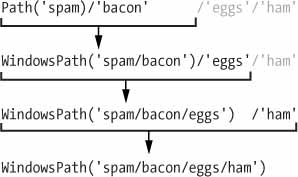

If you see the `TypeError: unsupported operand type(s) for /: 'str' and 'str'` error message shown previously, you need to put a Path object on the left side of the expression.

The / operator replaces the older `os.path.join()` function, which you can learn more about from https://docs.python.org/3/library/os.path.html#os.path.join.

## The Current Working Directory
Every program that runs on your computer has a <i>current working directory</i>, or <i>cwd</i>. Any filenames or paths that do not begin with the root folder are assumed to be under the current working directory.

### Note
While folder is the more modern name for directory, note that current working directory (or just working directory) is the standard term, not “current working folder.”

You can get the current working directory as a string value with the `Path.cwd()` function and change it using `os.chdir()`. Enter the following into the interactive shell:

In [52]:
#from pathlib import Path
import os
Path.cwd()

PosixPath('/home/gseo/notebook-examples-expanse-dev/Boring_Python')

There is no pathlib function for changing the working directory, because changing the current working directory while a program is running can often lead to subtle bugs.

The `os.getcwd()` function is the older way of getting the current working directory as a string.

## The Home Directory
All users have a folder for their own files on the computer called the <i>home directory</i> or <i>home folder</i>. You can get a Path object of the home folder by calling `Path.home()`:

In [53]:
Path.home()

PosixPath('/home/gseo')

The home directories are located in a set place depending on your operating system:

- On Windows, home directories are under C:\Users.
- On Mac, home directories are under /Users.
- On Linux, home directories are often under /home.

Your scripts will almost certainly have permissions to read and write the files under your home directory, so it’s an ideal place to put the files that your Python programs will work with.

## Absolute vs. Relative Paths
There are two ways to specify a file path:

- An <i>absolute path</i>, which always begins with the root folder
- A <i>relative path</i>, which is relative to the program’s current working directory

There are also the <i>dot</i> (.) and <i>dot-dot</i> (..) folders. These are not real folders but special names that can be used in a path. A single period (“dot”) for a folder name is shorthand for “this directory.” Two periods (“dot-dot”) means “the parent folder.”

This is an example of some folders and files. When the current working directory is set to C:\bacon, the relative paths for the other folders and files are set as they are in the figure.

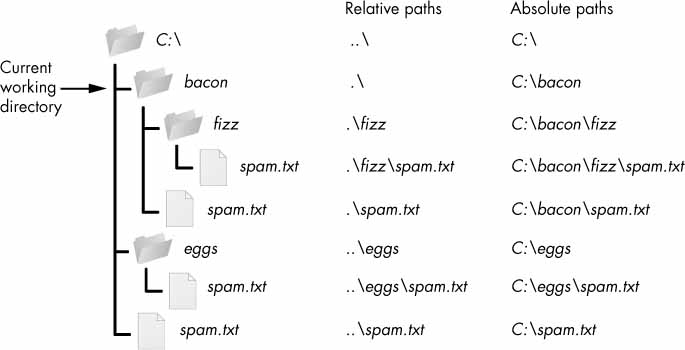

The .\ at the start of a relative path is optional. For example, .\spam.txt and spam.txt refer to the same file.

## Creating New Folders Using the os.makedirs() Function
Your programs can create new folders (directories) with the os.makedirs() function. Enter the following into the interactive shell:

In [54]:
#import os
os.makedirs('C:\\delicious\\walnut\\waffles')

FileExistsError: [Errno 17] File exists: 'C:\\delicious\\walnut\\waffles'

This will create not just the C:\delicious folder but also a <i>walnut</i> folder inside C:\delicious and a <i>waffles</i> folder inside C:\delicious\walnut. That is, `os.makedirs()` will create any necessary intermediate folders in order to ensure that the full path exists. This figure shows this hierarchy of folders.

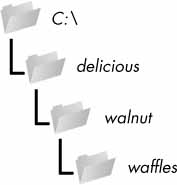

To make a directory from a Path object, call the `mkdir()` method. For example, this code will create a spam folder under the home folder on my computer:

In [55]:
from pathlib import Path
Path(r'C:\Users\Al\spam').mkdir()

FileExistsError: [Errno 17] File exists: 'C:\\Users\\Al\\spam'

Note that `mkdir()` can only make one directory at a time; it won’t make several subdirectories at once like `os.makedirs()`.

## Handling Absolute and Relative Paths
The pathlib module provides methods for checking whether a given path is an absolute path and returning the absolute path of a relative path.

Calling the `is_absolute()` method on a Path object will return `True` if it represents an absolute path or `False` if it represents a relative path. For example, enter the following into the interactive shell, using your own files and folders instead of the exact ones listed here:

In [102]:
Path.cwd()

PosixPath('/home/gseo/notebook-examples-expanse-dev/Boring_Python')

In [103]:
 Path.cwd().is_absolute()

True

In [104]:
Path('spam/bacon/eggs').is_absolute()

False

To get an absolute path from a relative path, you can put `Path.cwd() / ` in front of the relative Path object. After all, when we say “relative path,” we almost always mean a path that is relative to the current working directory. Enter the following into the interactive shell:

In [105]:
Path('my/relative/path')

PosixPath('my/relative/path')

In [106]:
Path.cwd() / Path('my/relative/path')

PosixPath('/home/gseo/notebook-examples-expanse-dev/Boring_Python/my/relative/path')

If your relative path is relative to another path besides the current working directory, just replace Path.cwd() with that other path instead. The following example gets an absolute path using the home directory instead of the current working directory:

In [107]:
Path('my/relative/path')

PosixPath('my/relative/path')

In [108]:
Path.home() / Path('my/relative/path')

PosixPath('/home/gseo/my/relative/path')

The `os.path` module also has some useful functions related to absolute and relative paths:

- Calling `os.path.abspath([path)` will return a string of the absolute path of the argument. This is an easy way to convert a relative path into an absolute one.
- Calling `os.path.isabs(path)` will return True if the argument is an absolute path and False if it is a relative path.
- Calling `os.path.relpath(path, start)` will return a string of a relative path from the start path to path. If start is not provided, the current working directory is used as the start path.

In [109]:
os.path.abspath('.')

'/home/gseo/notebook-examples-expanse-dev/Boring_Python'

In [110]:
os.path.abspath('.\\Scripts')

'/home/gseo/notebook-examples-expanse-dev/Boring_Python/.\\Scripts'

In [111]:
os.path.isabs('.')

False

In [112]:
os.path.isabs(os.path.abspath('.'))

True

In [113]:
os.path.relpath('C:\\Windows', 'C:\\')

'../C:\\Windows'

In [114]:
os.path.relpath('C:\\Windows', 'C:\\spam\\eggs')

'../C:\\Windows'

## Getting the Parts of a File Path
Given a Path object, you can extract the file path’s different parts as strings using several Path object attributes. These can be useful for constructing new file paths based on existing ones. 

The parts of a file path include the following:
- The <i>anchor</i>, which is the root folder of the filesystem
- On Windows, the <i>drive</i>, which is the single letter that often denotes a physical hard drive or other storage device
- The <i>parent</i>, which is the folder that contains the file
- The <i>name</i> of the file, made up of the stem (or base name) and the suffix (or extension)

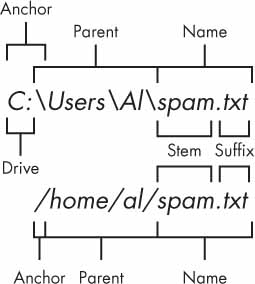

In [115]:
p = Path('C:/Users/Al/spam.txt')
p.anchor

''

In [116]:
p.parent # This is a Path object, not a string.

PosixPath('C:/Users/Al')

In [117]:
p.name

'spam.txt'

In [118]:
p.stem

'spam'

In [119]:
p.suffix

'.txt'

In [120]:
p.drive

''

These attributes evaluate to simple string values, except for parent, which evaluates to another Path object.

The parents attribute (which is different from the parent attribute) evaluates to the ancestor folders of a Path object with an integer index:

In [121]:
Path.cwd()

PosixPath('/home/gseo/notebook-examples-expanse-dev/Boring_Python')

In [122]:
Path.cwd().parents[0]

PosixPath('/home/gseo/notebook-examples-expanse-dev')

In [123]:
Path.cwd().parents[1]

PosixPath('/home/gseo')

In [124]:
Path.cwd().parents[2]

PosixPath('/home')

The older os.path module also has similar functions for getting the different parts of a path written in a string value. Calling `os.path.dirname(path)` will return a string of everything that comes before the last slash in the path argument. Calling `os.path.basename(path)` will return a string of everything that comes after the last slash in the path argument.

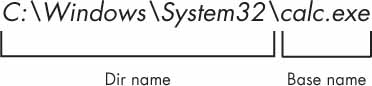

In [125]:
calcFilePath = 'C:\\Windows\\System32\\calc.exe'
os.path.basename(calcFilePath)

'C:\\Windows\\System32\\calc.exe'

In [126]:
os.path.dirname(calcFilePath)

''

## Finding File Sizes and Folder Contents
Once you have ways of handling file paths, you can then start gathering information about specific files and folders. The os.path module provides functions for finding the size of a file in bytes and the files and folders inside a given folder.

- Calling `os.path.getsize(path)` will return the size in bytes of the file in the path argument.
- Calling `os.listdir(path)` will return a list of filename strings for each file in the path argument. (Note that this function is in the os module, not os.path.)

## Modifying a List of Files Using Glob Patterns
If you want to work on specific files, the `glob()` method is simpler to use than `listdir()`. Path objects have a `glob()` method for listing the contents of a folder according to a glob pattern. Glob patterns are like a simplified form of regular expressions often used in command line commands. The `glob()` method returns a generator object (which are beyond the scope of this book) that you’ll need to pass to `list()` to easily view in the interactive shell:

In [127]:
p = Path('C:/Users/Al/Desktop')
p.glob('*')

<generator object Path.glob at 0x155550e2beb0>

In [128]:
list(p.glob('*')) # Make a list from the generator.
# The asterisk (*) stands for “multiple of any characters,” so p.glob('*') 
# returns a generator of all files in the path stored in p.

[]

In [129]:
list(p.glob('*.txt')) # Lists all text files.

[]

In [130]:
list(p.glob('*.?x?')) # The glob expression '*.?x?' will return files with any name and any three-character extension 
                      # where the middle character is an 'x'.

[]

In [131]:
p = Path('C:/Users/Al/Desktop')
for textFilePathObj in p.glob('*.txt'):
     print(textFilePathObj) # Prints the Path object as a string.
     # Do something with the text file.

## Checking Path Validity
Many Python functions will crash with an error if you supply them with a path that does not exist. Luckily, Path objects have methods to check whether a given path exists and whether it is a file or folder. Assuming that a variable p holds a Path object, you could expect the following:

- Calling `p.exists()` returns True if the path exists or returns False if it doesn’t exist.
- Calling `p.is_file()` returns True if the path exists and is a file, or returns False otherwise.
- Calling `p.is_dir()` returns True if the path exists and is a directory, or returns False otherwise.

You can determine whether there is a DVD or flash drive currently attached to the computer by checking for it with the `exists()` method. For instance, if I wanted to check for a flash drive with the volume named D:\ on my Windows computer, I could do that with the following:

In [132]:
dDrive = Path('D:/')
dDrive.exists()

False

# The File Reading/Writing Process

Once you are comfortable working with folders and relative paths, you’ll be able to specify the location of files to read and write. The functions covered in the next few sections will apply to plaintext files.
Plaintext files contain only basic text characters and do not include font, size, or color information. Text files with the .txt extension or Python script files with the .py extension are examples of plaintext files.
These can be opened with Windows’s Notepad or macOS’s TextEdit application. Your programs can easily read the contents of plaintext files and treat them as an ordinary string value.

<i>Binary files</i> are all other file types, such as word processing documents, PDFs, images, spreadsheets, and executable programs. If you open a binary file in Notepad or TextEdit, it will look like scrambled nonsense, like in the figure below.

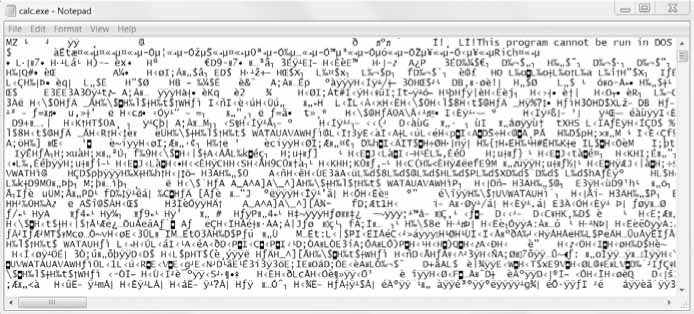

Since every different type of binary file must be handled in its own way, we will not go into reading and writing raw binary files directly. Fortunately, many modules make working with binary files easier—you will explore one of them, the shelve module, later in this chapter. The pathlib module’s `read_text()` method returns a string of the full contents of a text file. Its `write_text()` method creates a new text file (or overwrites an existing one) with the string passed to it. 

In [133]:
from pathlib import Path
p = Path('spam.txt')
p.write_text('Hello, world!')

13

In [134]:
p.read_text()

'Hello, world!'

These method calls create a <i>spam.txt</i> file with the content 'Hello, world!'. The 13 that `write_text()` returns indicates that 13 characters were written to the file. (You can often disregard this information.) The `read_text()` call reads and returns the contents of our new file as a string: 'Hello, world!'.

Keep in mind that these Path object methods only provide basic interactions with files. The more common way of writing to a file involves using the open() function and file objects. There are three steps to reading or writing files in Python:

1. Call the `open()` function to return a File object.
2. Call the `read()` or `write()` method on the File object.
3. Close the file by calling the `close()` method on the File object.

## Opening Files with the open() Function
To open a file with the `open()` function, you pass it a string path indicating the file you want to open; it can be either an absolute or relative path. The `open()` function returns a File object.

Try it by creating a text file named <i>hello.txt</i> using Notepad or TextEdit. Type "Hello, world!" as the content of this text file and save it in your user home folder.

Then run the following commands in a shell:
`helloFile = open(Path.home() / 'hello.txt')`

Windows:
`helloFile = open('C:\\Users\\your_home_folder\\hello.txt')`

macOS: 
`helloFile = open('/Users/your_home_folder/hello.txt')`

Both these commands will open the file in “reading plaintext” mode, or read mode for short. When a file is opened in read mode, Python lets you only read data from the file; you can’t write or modify it in any way. Read mode is the default mode for files you open in Python. You can explicitly specify the mode by passing the string value 'r' as a second argument to open(). So `open('/Users/Al/hello.txt', 'r')` and `open('/Users/Al/hello.txt')` do the same thing.

The call to open() returns a File object. A File object represents a file on your computer; it is simply another type of value in Python, much like the lists and dictionaries you’re already familiar with.

## Reading the Contents of Files
Now that you have a File object, you can start reading from it. If you want to read the entire contents of a file as a string value, use the File object’s `read()` method. Let’s continue with the hello.txt File object you stored in helloFile. 

`helloContent = helloFile.read()` <br>
`helloContent`

You can use the `readlines()` method to get a list of string values from the file, one string for each line of text.

## Writing to Files
Python allows you to write content to a file in a way similar to how the print() function “writes” strings to the screen. You can’t write to a file you’ve opened in read mode, though. Instead, you need to open it in “write plaintext” mode or “append plaintext” mode, or <i>write mode</i> and <i>append mode</i> for short.

Write mode will overwrite the existing file and start from scratch, just like when you overwrite a variable’s value with a new value. Pass 'w' as the second argument to `open()` to open the file in write mode. Append mode, on the other hand, will append text to the end of the existing file. You can think of this as appending to a list in a variable, rather than overwriting the variable altogether. Pass 'a' as the second argument to `open()` to open the file in append mode.

If the filename passed to `open()` does not exist, both write and append mode will create a new, blank file. After reading or writing a file, call the `close()` method before opening the file again.

In [135]:
baconFile = open('bacon.txt', 'w')   
baconFile.write('Hello, world!\n')

14

In [136]:
baconFile.close()
baconFile = open('bacon.txt', 'a')
baconFile.write('Bacon is not a vegetable.')

25

In [137]:
baconFile.close()
baconFile = open('bacon.txt')
content = baconFile.read()
baconFile.close()
print(content)

Hello, world!
Bacon is not a vegetable.


First, we open bacon.txt in write mode. Since there isn’t a bacon.txt yet, Python creates one. Calling write() on the opened file and passing write() the string argument 'Hello, world! /n' writes the string to the file and returns the number of characters written, including the newline. Then we close the file.

To add text to the existing contents of the file instead of replacing the string we just wrote, we open the file in append mode. We write 'Bacon is not a vegetable.' to the file and close it.

Note that the `write()` method does not automatically add a newline character to the end of the string like the print() function does. You will have to add this character yourself.

## Saving Variables with the shelve Module
You can save variables in your Python programs to binary shelf files using the shelve module. This way, your program can restore data to variables from the hard drive. The shelve module will let you add Save and Open features to your program. For example, if you ran a program and entered some configuration settings, you could save those settings to a shelf file and then have the program load them the next time it is run.

In [138]:
import shelve
shelfFile = shelve.open('mydata')
cats = ['Zophie', 'Pooka', 'Simon']
shelfFile['cats'] = cats
shelfFile.close()

To read and write data using the shelve module, you first import shelve. Call shelve.open() and pass it a filename, and then store the returned shelf value in a variable. You can make changes to the shelf value as if it were a dictionary. When you’re done, call close() on the shelf value. Here, our shelf value is stored in shelfFile. We create a list cats and write shelfFile['cats'] = cats to store the list in shelfFile as a value associated with the key 'cats' (like in a dictionary). Then we call close() on shelfFile. Note that as of Python 3.7, you have to pass the open() shelf method filenames as strings. You can’t pass it Path object.

In [139]:
shelfFile = shelve.open('mydata')
type(shelfFile)

shelve.DbfilenameShelf

In [140]:
shelfFile['cats']

['Zophie', 'Pooka', 'Simon']

In [141]:
shelfFile.close()

Here, we open the shelf files to check that our data was stored correctly. Entering shelfFile['cats'] returns the same list that we stored earlier, so we know that the list is correctly stored, and we call close().

Just like dictionaries, shelf values have keys() and values() methods that will return list-like values of the keys and values in the shelf. Since these methods return list-like values instead of true lists, you should pass them to the `list()` function to get them in list form.

In [142]:
shelfFile = shelve.open('mydata')
list(shelfFile.keys())

['cats']

In [143]:
list(shelfFile.values())

[['Zophie', 'Pooka', 'Simon']]

In [144]:
shelfFile.close()

# Saving Variables with the pprint.pformat() Function
`pprint.pprint()` function will “pretty print” the contents of a list or dictionary to the screen, while the `pprint.pformat()` function will return this same text as a string instead of printing it. Not only is this string formatted to be easy to read, but it is also syntactically correct Python code. Say you have a dictionary stored in a variable and you want to save this variable and its contents for future use. Using pprint.pformat() will give you a string that you can write to a .py file. This file will be your very own module that you can import whenever you want to use the variable stored in it.

In [145]:
import pprint
cats = [{'name': 'Zophie', 'desc': 'chubby'}, {'name': 'Pooka', 'desc': 'fluffy'}]
pprint.pformat(cats)

"[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]"

In [146]:
fileObj = open('myCats.py', 'w')
fileObj.write('cats = ' + pprint.pformat(cats) + '\n')

83

In [147]:
fileObj.close()

Here, we import pprint to let us use `pprint.pformat()`. We have a list of dictionaries, stored in a variable cats. To keep the list in cats available even after we close the shell, we use pprint.pformat() to return it as a string. Once we have the data in cats as a string, it’s easy to write the string to a file, which we’ll call <i>myCats.py</i>.

The modules that an import statement imports are themselves just Python scripts. When the string from `pprint.pformat()` is saved to a .py file, the file is a module that can be imported just like any other.

And since Python scripts are themselves just text files with the .py file extension, your Python programs can even generate other Python programs. You can then import these files into scripts.

In [148]:
import myCats
myCats.cats

[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]

In [149]:
myCats.cats[0]

{'desc': 'chubby', 'name': 'Zophie'}

In [150]:
myCats.cats[0]['name']

'Zophie'

The benefit of creating a .py file (as opposed to saving variables with the shelve module) is that because it is a text file, the contents of the file can be read and modified by anyone with a simple text editor. For most applications, however, saving data using the shelve module is the preferred way to save variables to a file.

# Summary
Files are organized into folders (also called directories), and a path describes the location of a file. Every program running on your computer has a current working directory, which allows you to specify file paths relative to the current location instead of always typing the full (or absolute) path. The pathlib and os.path modules have many functions for manipulating file paths.

Your programs can also directly interact with the contents of text files. The open() function can open these files to read in their contents as one large string (with the read() method) or as a list of strings (with the readlines() method). The open() function can open files in write or append mode to create new text files or add to existing text files, respectively.

In previous chapters, you used the clipboard as a way of getting large amounts of text into a program, rather than typing it all in. Now you can have your programs read files directly from the hard drive, which is a big improvement, since files are much less volatile than the clipboard.

To find more projects/applications and practice questions on this topic, please visit https://automatetheboringstuff.com/2e/chapter9/.